# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy

from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    #color = 'brgcmyk'  #List colors
    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown','pink', 'olive', 'teal', 'navy', 'gray', 'maroon', 'lime', 'cyan', 'indigo']
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



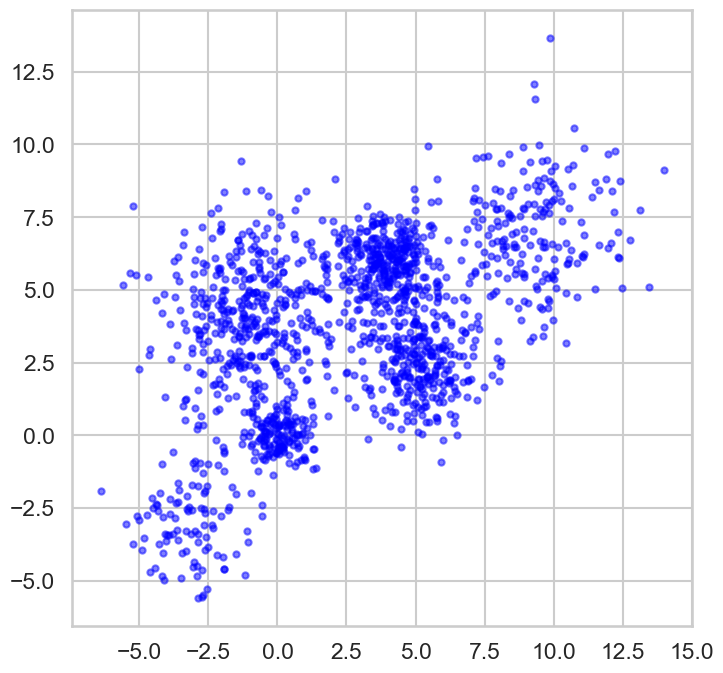

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [ ]:
Distortion_list = []
silhouette_score_list = []
num_of_clusters = np.arange(2, 18) 

for i in range(2,18):   
    # Create a KMeans instance with the desired number of clusters
    kmeans = KMeans(n_clusters=i)

    # Fit the model to the data
    kmeans.fit(Multi_blob_Data)

    # Get the cluster centroids
    centroids = kmeans.cluster_centers_

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    # Print the cluster centroids and labels
    print("Cluster Centroids:")
    print(centroids)
    print("Cluster Labels:")
    print(labels)
    plt.figure()
    plt.title("Number of clusters = {}".format(i))
    display_cluster(Multi_blob_Data,kmeans,num_clusters=i)
    Distortion_list.append(kmeans.inertia_)
    silhouette_score_list.append(silhouette_score(Multi_blob_Data,labels))
    
plt.figure()
plt.plot(num_of_clusters,Distortion_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

plt.figure()
plt.plot(num_of_clusters,silhouette_score_list)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
plt.show()
    
# 6 is the best number of clusters based on high silhouette score as well as the elbow of the distortion function

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

Euclidean distance and average linkage


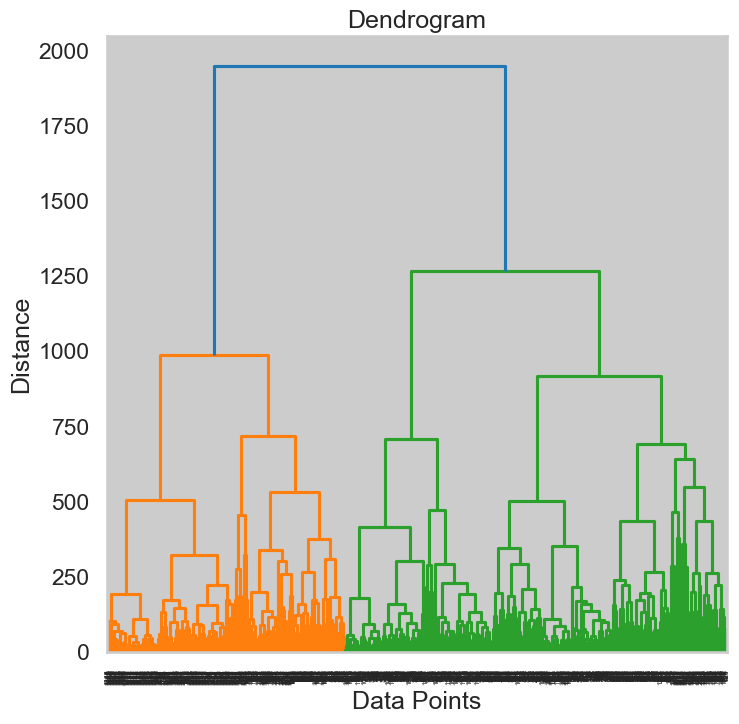

0.4716908069861964
Manhattan distance and average linkage


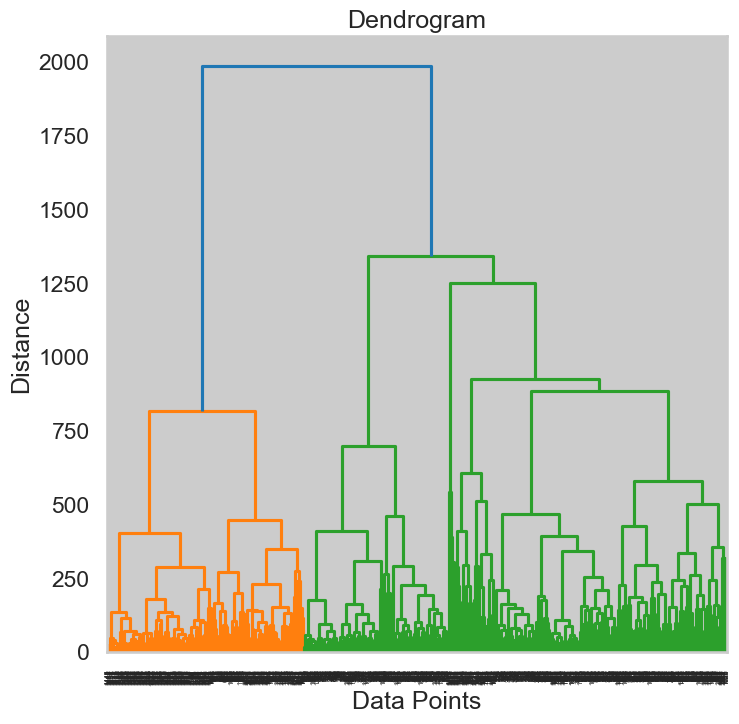

0.46762361386512785
Cosine distance and average linkage


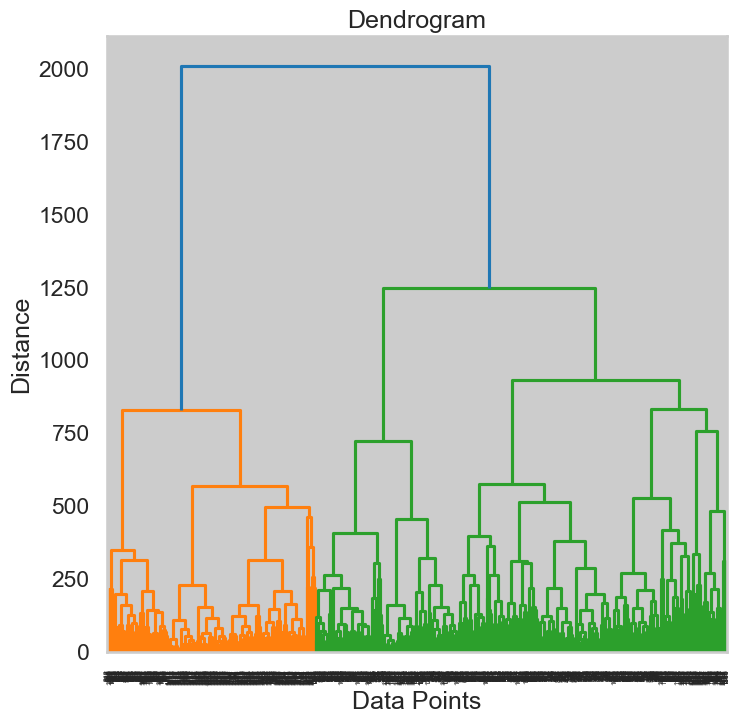

0.35251834131557364
Euclidean distance and single linkage


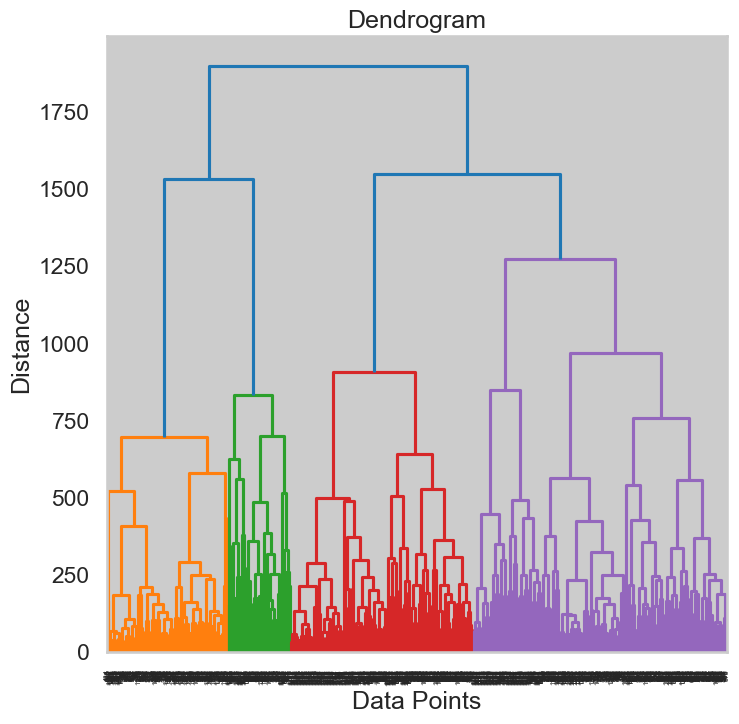

0.3218066204847175
Manhattan distance and single linkage


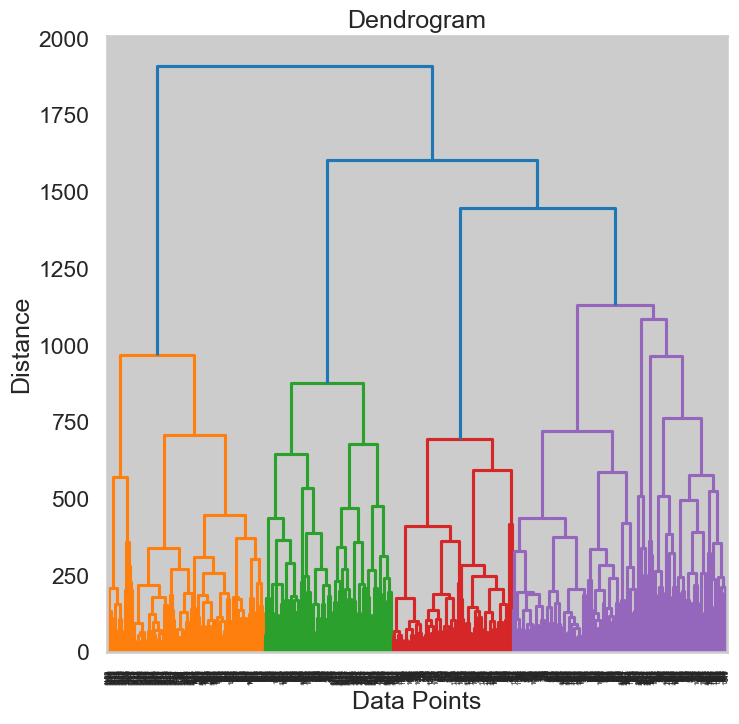

0.3218066204847175
Cosine distance and single linkage


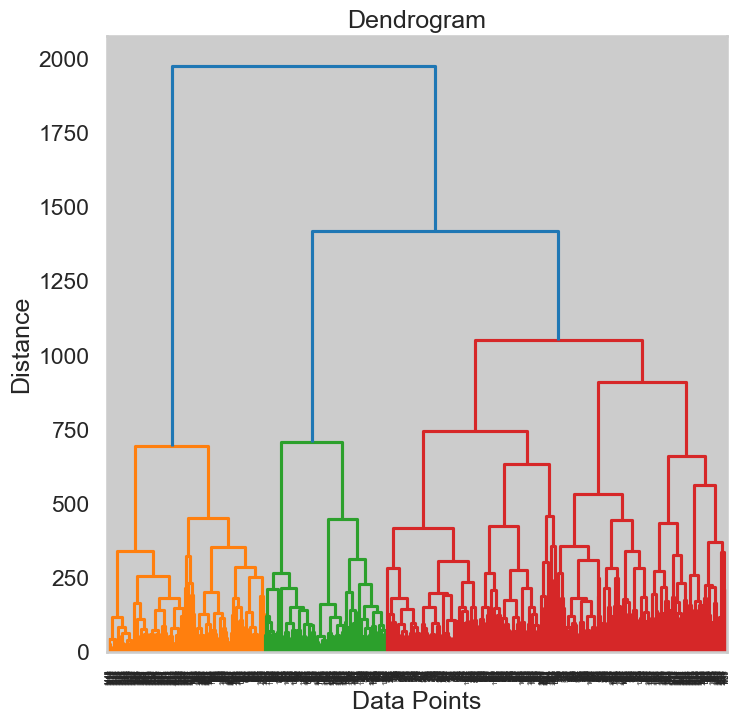

-0.016763591291336317


In [6]:
# euclidean and average
print("Euclidean distance and average linkage") 
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='average', distance_threshold=None)
#clustering = AgglomerativeClustering(n_clusters=None,metric='euclidean', linkage='average',distance_threshold=1000)
# Fit the model to your data
clustering.fit(Multi_blob_Data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(Multi_blob_Data,labels)

print(silhouette_score_var)


print("Manhattan distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(Multi_blob_Data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(Multi_blob_Data,labels)

print(silhouette_score_var)

print("Cosine distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(Multi_blob_Data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(Multi_blob_Data,labels)

print(silhouette_score_var)


print("Euclidean distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(Multi_blob_Data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(Multi_blob_Data,labels)

print(silhouette_score_var)


print("Manhattan distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(Multi_blob_Data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(Multi_blob_Data,labels)

print(silhouette_score_var)


print("Cosine distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(Multi_blob_Data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(Multi_blob_Data,labels)

print(silhouette_score_var)


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
silhouette_score_list = []
EPS_values = np.arange(0.1,3,0.1)
Min_samples_values = np.arange(5,25,5)

for EPS in EPS_values:
    for Min_samples in Min_samples_values:
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        dbscan.fit(Multi_blob_Data)
        cluster_labels = dbscan.labels_
        # Check if there are at least two unique labels
        unique_labels = np.unique(cluster_labels)
        print(cluster_labels)
        print(unique_labels)
        #silhouette score needs unique labels which represent different clusters to evaluate the clusters and get a score based on the clustering result "Number of cluster must be > 2"
        if len(unique_labels) > 1:
            score = silhouette_score(Multi_blob_Data, cluster_labels)
            print(score)
            silhouette_score_list.append(silhouette_score(Multi_blob_Data, cluster_labels))
        else:
            silhouette_score_list.append(np.nan)  # Set silhouette score to NaN if only one label
        
        #plot core points
        core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        core_points = Multi_blob_Data[core_samples_mask]
        plt.scatter(core_points[:, 0], core_points[:, 1], c='blue', marker='o', s=100, label='Core Points')
        
        #plot boarder points
        non_core_points = Multi_blob_Data[~core_samples_mask & (cluster_labels != -1)]
        plt.scatter(non_core_points[:, 0], non_core_points[:, 1], c='orange', marker='o', s=50, label='Border Points')
        
        #plot noise points 
        noise_points = Multi_blob_Data[cluster_labels == -1]
        plt.scatter(noise_points[:, 0], noise_points[:, 1], c='red', marker='x', label='Noise Points')
        plt.title('Points type with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()
        
        for label in np.unique(cluster_labels):
            if label == -1:
                plt.scatter(Multi_blob_Data[cluster_labels == label, 0],Multi_blob_Data[cluster_labels == label, 1], c='black', marker='o', label='Noise')
            else:
                plt.scatter(Multi_blob_Data[cluster_labels == label, 0], Multi_blob_Data[cluster_labels == label, 1], marker='o', label=f'Cluster {label}')

        plt.title('DBSCAN Clustering with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()

        
'''
print(silhouette_score_list)
plt.figure()
plt.plot(EPS_values,silhouette_score_list,label='EPS Values')
#plt.xlabel('EPS Values')
#plt.ylabel('silhouette score')
plt.plot(Min_samples_values,silhouette_score_list,label='Minimum samples Values')
plt.show()
'''

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris_data = load_iris()
# Extract features and target
X = iris_data.data
y = iris_data.target

# Plotting Sepal Length vs Sepal Width
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Setosa', c='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Versicolor', c='blue')
plt.scatter(X[y == 2, 0], X[y == 2, 1], label='Virginica', c='green')

iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
# Normalize the data using StandardScaler where each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_normalized = scaler.fit_transform(iris_data.data)

# Display the normalized data
print(X_normalized)

## Kmeans Normalized Data
* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [ ]:
Distortion_list = []
silhouette_score_list = []
num_of_clusters = np.arange(2, 18) 

for i in range(2,18):   
    # Create a KMeans instance with the desired number of clusters
    kmeans = KMeans(n_clusters=i)

    # Fit the model to the data
    kmeans.fit(X_normalized)

    # Get the cluster centroids
    centroids = kmeans.cluster_centers_

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    # Print the cluster centroids and labels
    print("Cluster Centroids:")
    print(centroids)
    print("Cluster Labels:")
    print(labels)
    plt.figure()
    plt.title("Number of clusters = {}".format(i))
    display_cluster(X_normalized,kmeans,num_clusters=i)
    Distortion_list.append(kmeans.inertia_)
    silhouette_score_list.append(silhouette_score(X_normalized,labels))
    
plt.figure()
plt.plot(num_of_clusters,Distortion_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

plt.figure()
plt.plot(num_of_clusters,silhouette_score_list)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
plt.show()
    
# 6 is the best number of clusters based on high silhouette score as well as the elbow of the distortion function

## Kmeans Unnormalized Data
* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [ ]:
Distortion_list = []
silhouette_score_list = []
num_of_clusters = np.arange(2, 18) 

for i in range(2,18):   
    # Create a KMeans instance with the desired number of clusters
    kmeans = KMeans(n_clusters=i)

    # Fit the model to the data
    kmeans.fit(iris_data.data)

    # Get the cluster centroids
    centroids = kmeans.cluster_centers_

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    # Print the cluster centroids and labels
    print("Cluster Centroids:")
    print(centroids)
    print("Cluster Labels:")
    print(labels)
    plt.figure()
    plt.title("Number of clusters = {}".format(i))
    display_cluster(iris_data.data,kmeans,num_clusters=i)
    Distortion_list.append(kmeans.inertia_)
    silhouette_score_list.append(silhouette_score(iris_data.data,labels))
    
plt.figure()
plt.plot(num_of_clusters,Distortion_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

plt.figure()
plt.plot(num_of_clusters,silhouette_score_list)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
plt.show()
    
# 6 is the best number of clusters based on high silhouette score as well as the elbow of the distortion function

### Hierarchal Clustering of Normalized iris data
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [ ]:
# euclidean and average
print("Euclidean distance and average linkage") 
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='average', distance_threshold=None)
#clustering = AgglomerativeClustering(n_clusters=None,metric='euclidean', linkage='average',distance_threshold=1000)
# Fit the model to your data
clustering.fit(X_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(X_normalized,labels)

print(silhouette_score_var)


print("Manhattan distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(X_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(X_normalized,labels)

print(silhouette_score_var)

print("Cosine distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(X_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(X_normalized,labels)

print(silhouette_score_var)


print("Euclidean distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(X_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(X_normalized,labels)

print(silhouette_score_var)


print("Manhattan distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(X_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(X_normalized,labels)

print(silhouette_score_var)


print("Cosine distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(X_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(X_normalized,labels)

print(silhouette_score_var)


### Hierarchal Clustering of unnormalized iris data
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [ ]:
# euclidean and average
print("Euclidean distance and average linkage") 
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='average', distance_threshold=None)
#clustering = AgglomerativeClustering(n_clusters=None,metric='euclidean', linkage='average',distance_threshold=1000)
# Fit the model to your data
clustering.fit(iris_data.data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(iris_data.data,labels)

print(silhouette_score_var)


print("Manhattan distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(iris_data.data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(iris_data.data,labels)

print(silhouette_score_var)

print("Cosine distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(iris_data.data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(iris_data.data,labels)

print(silhouette_score_var)


print("Euclidean distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(iris_data.data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(iris_data.data,labels)

print(silhouette_score_var)


print("Manhattan distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(iris_data.data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(iris_data.data,labels)

print(silhouette_score_var)


print("Cosine distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(iris_data.data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(iris_data.data,labels)

print(silhouette_score_var)


### DBScan of Normalized Iris
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
silhouette_score_list = []
EPS_values = np.arange(0.1,3,0.1)
Min_samples_values = np.arange(5,25,5)

for EPS in EPS_values:
    for Min_samples in Min_samples_values:
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        dbscan.fit(X_normalized)
        cluster_labels = dbscan.labels_
        # Check if there are at least two unique labels
        unique_labels = np.unique(cluster_labels)
        print(cluster_labels)
        print(unique_labels)
        #silhouette score needs unique labels which represent different clusters to evaluate the clusters and get a score based on the clustering result "Number of cluster must be > 2"
        if len(unique_labels) > 1:
            score = silhouette_score(X_normalized, cluster_labels)
            print(score)
            silhouette_score_list.append(silhouette_score(X_normalized, cluster_labels))
        else:
            silhouette_score_list.append(np.nan)  # Set silhouette score to NaN if only one label
        
        #plot core points
        core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        core_points = X_normalized[core_samples_mask]
        plt.scatter(core_points[:, 0], core_points[:, 1], c='blue', marker='o', s=100, label='Core Points')
        
        #plot boarder points
        non_core_points = X_normalized[~core_samples_mask & (cluster_labels != -1)]
        plt.scatter(non_core_points[:, 0], non_core_points[:, 1], c='orange', marker='o', s=50, label='Border Points')
        
        #plot noise points 
        noise_points = X_normalized[cluster_labels == -1]
        plt.scatter(noise_points[:, 0], noise_points[:, 1], c='red', marker='x', label='Noise Points')
        plt.title('Points type with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()
        
        for label in np.unique(cluster_labels):
            if label == -1:
                plt.scatter(X_normalized[cluster_labels == label, 0],X_normalized[cluster_labels == label, 1], c='black', marker='o', label='Noise')
            else:
                plt.scatter(X_normalized[cluster_labels == label, 0], X_normalized[cluster_labels == label, 1], marker='o', label=f'Cluster {label}')

        plt.title('DBSCAN Clustering with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()

        
'''
print(silhouette_score_list)
plt.figure()
plt.plot(EPS_values,silhouette_score_list,label='EPS Values')
#plt.xlabel('EPS Values')
#plt.ylabel('silhouette score')
plt.plot(Min_samples_values,silhouette_score_list,label='Minimum samples Values')
plt.show()
'''
#E = 0.9 and samples = 20

### DBScan of unnormalized Iris
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
silhouette_score_list = []
EPS_values = np.arange(0.1,3,0.1)
Min_samples_values = np.arange(5,25,5)

for EPS in EPS_values:
    for Min_samples in Min_samples_values:
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        dbscan.fit(iris_data.data)
        cluster_labels = dbscan.labels_
        # Check if there are at least two unique labels
        unique_labels = np.unique(cluster_labels)
        print(cluster_labels)
        print(unique_labels)
        #silhouette score needs unique labels which represent different clusters to evaluate the clusters and get a score based on the clustering result "Number of cluster must be > 2"
        if len(unique_labels) > 1:
            score = silhouette_score(iris_data.data, cluster_labels)
            print(score)
            silhouette_score_list.append(silhouette_score(iris_data.data, cluster_labels))
        else:
            silhouette_score_list.append(np.nan)  # Set silhouette score to NaN if only one label
        
        #plot core points
        core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        core_points = iris_data.data[core_samples_mask]
        plt.scatter(core_points[:, 0], core_points[:, 1], c='blue', marker='o', s=100, label='Core Points')
        
        #plot boarder points
        non_core_points = iris_data.data[~core_samples_mask & (cluster_labels != -1)]
        plt.scatter(non_core_points[:, 0], non_core_points[:, 1], c='orange', marker='o', s=50, label='Border Points')
        
        #plot noise points 
        noise_points = iris_data.data[cluster_labels == -1]
        plt.scatter(noise_points[:, 0], noise_points[:, 1], c='red', marker='x', label='Noise Points')
        plt.title('Points type with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()
        
        for label in np.unique(cluster_labels):
            if label == -1:
                plt.scatter(iris_data.data[cluster_labels == label, 0],iris_data.data[cluster_labels == label, 1], c='black', marker='o', label='Noise')
            else:
                plt.scatter(iris_data.data[cluster_labels == label, 0], iris_data.data[cluster_labels == label, 1], marker='o', label=f'Cluster {label}')

        plt.title('DBSCAN Clustering with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()

        
'''
print(silhouette_score_list)
plt.figure()
plt.plot(EPS_values,silhouette_score_list,label='EPS Values')
#plt.xlabel('EPS Values')
#plt.ylabel('silhouette score')
plt.plot(Min_samples_values,silhouette_score_list,label='Minimum samples Values')
plt.show()
'''

## Customer dataset
Repeat all the above on the customer data set 

In [ ]:
data_csv = pd.read_csv('Customer data.csv')
data_csv = data_csv.drop(data_csv.columns[0], axis=1)
column_labels = data_csv.columns.tolist()
print(data_csv)
data = data_csv.values
print(data)
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

## Kmeans Normalized Customer dataset
Repeat all the above on the customer data set 

In [ ]:
Distortion_list = []
silhouette_score_list = []
num_of_clusters = np.arange(2, 18) 

for i in range(2,18):   
    # Create a KMeans instance with the desired number of clusters
    kmeans = KMeans(n_clusters=i)

    # Fit the model to the data
    kmeans.fit(data_normalized)

    # Get the cluster centroids
    centroids = kmeans.cluster_centers_

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    # Print the cluster centroids and labels
    print("Cluster Centroids:")
    print(centroids)
    print("Cluster Labels:")
    print(labels)
    plt.figure()
    plt.title("Number of clusters = {}".format(i))
    display_cluster(data_normalized,kmeans,num_clusters=i)
    Distortion_list.append(kmeans.inertia_)
    silhouette_score_list.append(silhouette_score(data_normalized,labels))
    
plt.figure()
plt.plot(num_of_clusters,Distortion_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

plt.figure()
plt.plot(num_of_clusters,silhouette_score_list)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
plt.show()
    
# 6 is the best number of clusters based on high silhouette score as well as the elbow of the distortion function

## Kmeans unnormalized Customer dataset
Repeat all the above on the customer data set 

In [ ]:
Distortion_list = []
silhouette_score_list = []
num_of_clusters = np.arange(2, 18) 

for i in range(2,18):   
    # Create a KMeans instance with the desired number of clusters
    kmeans = KMeans(n_clusters=i)

    # Fit the model to the data
    kmeans.fit(data)

    # Get the cluster centroids
    centroids = kmeans.cluster_centers_

    # Get the cluster labels for each data point
    labels = kmeans.labels_

    # Print the cluster centroids and labels
    print("Cluster Centroids:")
    print(centroids)
    print("Cluster Labels:")
    print(labels)
    plt.figure()
    plt.title("Number of clusters = {}".format(i))
    display_cluster(data,kmeans,num_clusters=i)
    Distortion_list.append(kmeans.inertia_)
    silhouette_score_list.append(silhouette_score(data,labels))
    
plt.figure()
plt.plot(num_of_clusters,Distortion_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

plt.figure()
plt.plot(num_of_clusters,silhouette_score_list)
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette score')
plt.show()
    
# 6 is the best number of clusters based on high silhouette score as well as the elbow of the distortion function

### Hierarchal Clustering of Normalized customer data set
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [ ]:
# euclidean and average
print("Euclidean distance and average linkage") 
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='average', distance_threshold=None)
#clustering = AgglomerativeClustering(n_clusters=None,metric='euclidean', linkage='average',distance_threshold=1000)
# Fit the model to your data
clustering.fit(data_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data_normalized,labels)

print(silhouette_score_var)


print("Manhattan distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(data_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data_normalized,labels)

print(silhouette_score_var)

print("Cosine distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(data_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data_normalized,labels)

print(silhouette_score_var)


print("Euclidean distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(data_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data_normalized,labels)

print(silhouette_score_var)


print("Manhattan distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(data_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data_normalized,labels)

print(silhouette_score_var)


print("Cosine distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(data_normalized)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data_normalized,labels)

print(silhouette_score_var)


### Hierarchal Clustering of unnormalized customer data set
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [ ]:
# euclidean and average
print("Euclidean distance and average linkage") 
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='average', distance_threshold=None)
#clustering = AgglomerativeClustering(n_clusters=None,metric='euclidean', linkage='average',distance_threshold=1000)
# Fit the model to your data
clustering.fit(data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data,labels)

print(silhouette_score_var)


print("Manhattan distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data,labels)

print(silhouette_score_var)

print("Cosine distance and average linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='average', distance_threshold=None)

# Fit the model to your data
clustering.fit(data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data,labels)

print(silhouette_score_var)


print("Euclidean distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='euclidean', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data,labels)

print(silhouette_score_var)


print("Manhattan distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='manhattan', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data,labels)

print(silhouette_score_var)


print("Cosine distance and single linkage")
# Create an instance of AgglomerativeClustering
clustering = AgglomerativeClustering(metric='cosine', linkage='single', distance_threshold=None)

# Fit the model to your data
clustering.fit(data)

# Get the labels of the clusters
labels = clustering.labels_
      
# Obtain the linkage matrix from the fitted model
Z = hierarchy.linkage(clustering.children_, 'average')  # 'average' linkage can be replaced with other linkage methods

dn = hierarchy.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()
silhouette_score_var = silhouette_score(data,labels)

print(silhouette_score_var)


### DBScan of Normalized Customer dataset
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
silhouette_score_list = []
EPS_values = np.arange(0.1,3,0.1)
Min_samples_values = np.arange(5,25,5)

for EPS in EPS_values:
    for Min_samples in Min_samples_values:
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        dbscan.fit(data_normalized)
        cluster_labels = dbscan.labels_
        # Check if there are at least two unique labels
        unique_labels = np.unique(cluster_labels)
        print(cluster_labels)
        print(unique_labels)
        #silhouette score needs unique labels which represent different clusters to evaluate the clusters and get a score based on the clustering result "Number of cluster must be > 2"
        if len(unique_labels) > 1:
            score = silhouette_score(data_normalized, cluster_labels)
            print(score)
            silhouette_score_list.append(silhouette_score(data_normalized, cluster_labels))
        else:
            silhouette_score_list.append(np.nan)  # Set silhouette score to NaN if only one label
        
        #plot core points
        core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        core_points = data_normalized[core_samples_mask]
        plt.scatter(core_points[:, 0], core_points[:, 1], c='blue', marker='o', s=100, label='Core Points')
        
        #plot boarder points
        non_core_points = data_normalized[~core_samples_mask & (cluster_labels != -1)]
        plt.scatter(non_core_points[:, 0], non_core_points[:, 1], c='orange', marker='o', s=50, label='Border Points')
        
        #plot noise points 
        noise_points = data_normalized[cluster_labels == -1]
        plt.scatter(noise_points[:, 0], noise_points[:, 1], c='red', marker='x', label='Noise Points')
        plt.title('Points type with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()
        
        for label in np.unique(cluster_labels):
            if label == -1:
                plt.scatter(data_normalized[cluster_labels == label, 0],data_normalized[cluster_labels == label, 1], c='black', marker='o', label='Noise')
            else:
                plt.scatter(data_normalized[cluster_labels == label, 0], data_normalized[cluster_labels == label, 1], marker='o', label=f'Cluster {label}')

        plt.title('DBSCAN Clustering with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()

        
'''
print(silhouette_score_list)
plt.figure()
plt.plot(EPS_values,silhouette_score_list,label='EPS Values')
#plt.xlabel('EPS Values')
#plt.ylabel('silhouette score')
plt.plot(Min_samples_values,silhouette_score_list,label='Minimum samples Values')
plt.show()
'''

### DBScan of unnormalized Customer dataset
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [ ]:
silhouette_score_list = []
EPS_values = np.arange(0.1,3,0.1)
Min_samples_values = np.arange(5,25,5)

for EPS in EPS_values:
    for Min_samples in Min_samples_values:
        dbscan = DBSCAN(eps=EPS, min_samples=Min_samples)
        dbscan.fit(data)
        cluster_labels = dbscan.labels_
        # Check if there are at least two unique labels
        unique_labels = np.unique(cluster_labels)
        print(cluster_labels)
        print(unique_labels)
        #silhouette score needs unique labels which represent different clusters to evaluate the clusters and get a score based on the clustering result "Number of cluster must be > 2"
        if len(unique_labels) > 1:
            score = silhouette_score(data, cluster_labels)
            print(score)
            silhouette_score_list.append(silhouette_score(data, cluster_labels))
        else:
            silhouette_score_list.append(np.nan)  # Set silhouette score to NaN if only one label
        
        #plot core points
        core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        core_points = data[core_samples_mask]
        plt.scatter(core_points[:, 0], core_points[:, 1], c='blue', marker='o', s=100, label='Core Points')
        
        #plot boarder points
        non_core_points = data[~core_samples_mask & (cluster_labels != -1)]
        plt.scatter(non_core_points[:, 0], non_core_points[:, 1], c='orange', marker='o', s=50, label='Border Points')
        
        #plot noise points 
        noise_points = data[cluster_labels == -1]
        plt.scatter(noise_points[:, 0], noise_points[:, 1], c='red', marker='x', label='Noise Points')
        plt.title('Points type with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()
        
        for label in np.unique(cluster_labels):
            if label == -1:
                plt.scatter(data[cluster_labels == label, 0],data[cluster_labels == label, 1], c='black', marker='o', label='Noise')
            else:
                plt.scatter(data[cluster_labels == label, 0], data[cluster_labels == label, 1], marker='o', label=f'Cluster {label}')

        plt.title('DBSCAN Clustering with EPS = {} and Min samples = {}'.format(EPS,Min_samples))
        plt.legend()
        plt.grid(True)
        plt.show()

        
'''
print(silhouette_score_list)
plt.figure()
plt.plot(EPS_values,silhouette_score_list,label='EPS Values')
#plt.xlabel('EPS Values')
#plt.ylabel('silhouette score')
plt.plot(Min_samples_values,silhouette_score_list,label='Minimum samples Values')
plt.show()
'''